# Gradient Boosted Trees

**Gradient Boosted Trees use decision trees as estimators. It can work with different loss functions (regression, classification, risk modelling etc.), evaluate it's gradient and approximates it with a simple tree (stage-wisely, that minimizes the overall error).**

AdaBoost is a special case of Gradient Boosted Tree that uses exponential loss function.

The Algorithm:
- Calculate the average of the label column as initially this average shall minimise the total error.
- Calculate the pseudo residuals.

Pseudo residual actual label- the predicted result (which is average in the first iterat ion)

Mathematically,

derivative of the pseudo residual
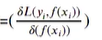

where, L is the loss function.

Here, the gradient of the error term is getting calculated as the goal is to minimize the err or. Hence the name gradient boosted trees

- create a tree to predict the pseudo residuals instead of a tree to predict for the actual column values.
- new result= previous result+learning rate* residual

Mathematically,


where is **v** the learning rate and **γ** is the residual 

Repeat these steps until the residual stops decreasing.

###### Example

For understanding this algorithm we'll use the following simple dataset for weight prediction
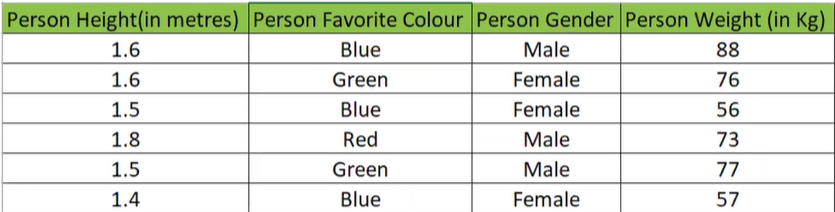

For the first iteration, calculate the average of the target column (weight here) as it minimizes the residual initially. 

Average = (86+76+56+73+77+57)/6=71.2

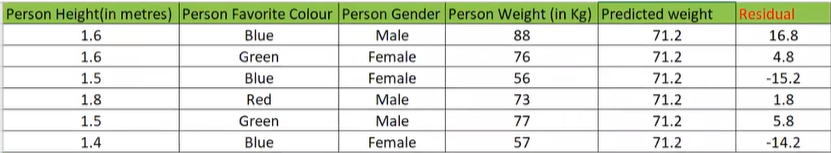

- We consider this as the first prediction and then we'll calculate the residual which is the difference between the predicted and the actual value as shown below:
- Now for prediction, we use the formula

**New value= old value+learning rate * residual**

If we consider the learning rate as 0.1, the result becomes.

**New value= 71.2+0.1*16.8= 72.9 (for the first row).**

Similarly the new predictions for all the rows is calculated.
- The above steps are repeated until there is no significant improvement in residuals or until we reach number of estimators

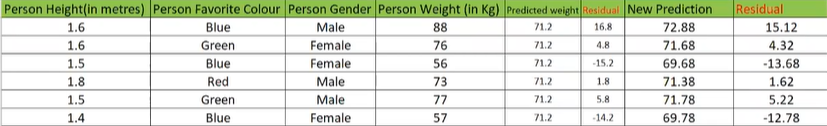
- The final result is given by

Final Value First Prediction+learning rate* 1st residual+ learning rate* 2nd residual and so on

**i.e Final Value = 71.2 (0.1*15.12) + (0.1 4.32) + (0.1-13.68) + (0.1 1.62) + so on**

# Gradient Boosted Trees

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Checking for messing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Just find correlation of feature vs target using corrwith

df.drop('target', axis=1).corrwith(df.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

### Visualize the correlation

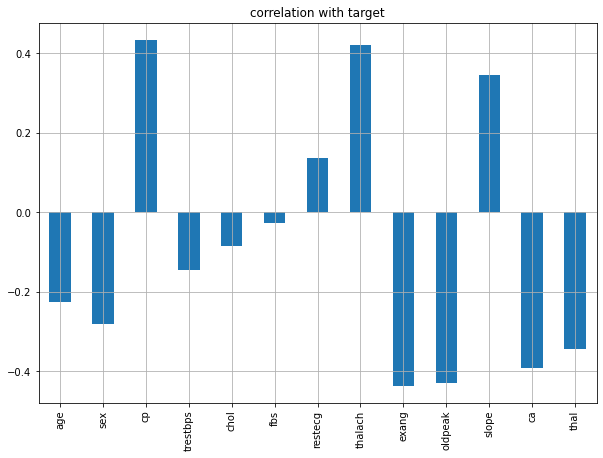

In [6]:
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar',grid=True, figsize=(10,7), title="correlation with target")

plt.show()

**Let's work on feature selection and see if that can help us building better model.**

## Model building using SelectPercentile features

In [7]:
from sklearn.feature_selection import SelectPercentile, chi2

when we apply chi2, we get p-values for all the features, Based on the p-values, it will select top 80% of features.

Example - if p-value<0.05, it will reject null hypothesis, Default null hypothesis is, there is no relation b/w feature and target

In [9]:
# Instantiate SelectPercentile and fit (feature, label)

x = df.drop(['target'],axis=1)
y = df.target

spercentile = SelectPercentile(score_func=chi2, percentile=80)

spercentile = spercentile.fit(x,y)

In [14]:
# Seperate the feature to check p-values
cols = spercentile.get_support(indices=True) # To return index numbers instead of boolean

print ('Feature Index =', cols)

features = x.columns[cols]
print ('Features =', list(features))

Feature Index = [ 0  1  2  3  4  7  8  9 10 11]
Features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [16]:
df_scores = pd.DataFrame({'feature': x.columns, 'chi2Score': spercentile.scores_, 'pValue': spercentile.pvalues_})

df_scores.sort_values(by='chi2Score',ascending=False)

,feature,chi2Score,pValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


**Let's print the top 80% features**

In [17]:
# Create subset of selected features

x = df[features]

y = df.target

In [18]:
# Import libs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=42)

## GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score

In [21]:
# Write one function and call as many as times to check accuracy_score of different models

def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===================Train Result==============")
        
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n====================Test Result===============")
        
        print(f"Accuracy Score: {accuracy_score(y_test,pred)* 100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [22]:
# Initiate GradientBoostingClassifier

gbdt_clf = GradientBoostingClassifier()

# Train the model

gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [23]:
# Call the function and pass dataset to check train and test score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False) # This is for testing score


===================Train Result==============
Accuracy Score: 100.00%

====================Test Result===============
Accuracy Score: 83.52%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



**Let's try if we can improve the performance of our model using parameter tunning**


# Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_param = {'max_depth' : range(4,8), 
              'min_samples_split': range(2,8,2), 
              'learning_rate': np.arange(0.1,0.3)
}

In [31]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)

grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [32]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 4}

In [34]:
gbdt_clf = GradientBoostingClassifier(max_depth=8, min_samples_split=2,learning_rate=0.1)

gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8)

In [35]:
# Call the function and pass dataset to check train and test score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)  # This is for training score

metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False) # This is for testing score


===================Train Result==============
Accuracy Score: 100.00%

====================Test Result===============
Accuracy Score: 72.53%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        41
           1       0.76      0.74      0.75        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.73      0.73      0.73        91

